In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.path as mpath
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
import os
import csv
from matplotlib.gridspec import GridSpec


In [7]:
def kernel(x, loc):
    out = 0
    for i in [-1,0,1]:
        out += 0.5*np.exp(-(25.0*((x+(i)) - loc))**(2));
    return out

In [8]:
def rust_k_circ(ts, vs):
    with open("temp.csv" , mode= "w") as f:
        wtr = csv.writer(f)

        wtr.writerow(ts)
        wtr.writerow(vs)

    rust_path = "~/Documents/HML/cleaning/ABM/fp/ripleys_k/target/release/ripleys_k"
    current_path = os.getcwd()
    
    os.system(f"{rust_path} {current_path}/temp.csv {current_path}/temp_out.csv 1")

    with open("temp_out.csv") as f:
        reader = csv.reader(f)

        for v in reader:
            out = [float(a) for a in v]
            break
    
    os.system(f"rm {current_path}/temp.csv")
    os.system(f"rm {current_path}/temp_out.csv")
    return out

def expectation_diff(vs, res=50):
    ts = np.linspace(0,0.5,res)
    ks = rust_k_circ(ts,vs)
    ex_ks = 2*ts
    diffs = np.abs(ks-ex_ks)
    return np.average(diffs), ts, ks

In [9]:
def get_final(dir_to_get):
    out = []
    run_len = len(os.listdir(dir_to_get))
    with open(dir_to_get+f"{run_len-1}.csv") as f:
        reader = csv.reader(f)

        for v in reader:
            out.append([float(a) for a in v])
        return out

def get_ics(dir_to_get):
    out = []
    run_len = len(os.listdir(dir_to_get))
    with open(dir_to_get+f"{0}.csv") as f:
        reader = csv.reader(f)

        for v in reader:
            out.append([float(a) for a in v])
        return out

def get_all(dir_to_get):
    out = []
    runs = np.sort([int(a[0:-4]) for a in os.listdir(dir_to_get)])
    for run in runs:
        run_out = []
        with open(dir_to_get+f"{run}.csv") as f:
            reader = csv.reader(f)

            for v in reader:
                run_out.append([float(a) for a in v])
        out.append(run_out)
    return out

Average Taxis/Diffusion Sensitivity of 5 different initial conditions.

In [6]:
t_sens_dir = "/media/jonatank/PG/HML/taxis_sens"
# taxis_list = np.sort(os.listdir(t_sens_dir) )
# diff_list = np.sort(os.listdir(t_sens_dir + "_0/taxis_0.0/"))
taxis_list = np.load("/media/jonatank/PG/HML/taxis_sens_tlist.npy")
diff_list = np.load("/media/jonatank/PG/HML/taxis_sens_dlist.npy")
# taxis_data = []
# for ic_num in range(5):
#     d = []
#     for t_val in taxis_list:
#         d_temp=[]
#         for d_val in diff_list:
#             final = get_final(f"{t_sens_dir}_{ic_num}/{t_val}/{d_val}/")
#             ed, _, _ = expectation_diff(final[0])
#             d_temp.append(ed)
#         d.append(d_temp)
#     taxis_data.append(d)
taxis_data = np.load(f"{t_sens_dir}_final_ks.npy");
taxis_data_avg = np.load(f"{t_sens_dir}_final_ks_avg.npy");


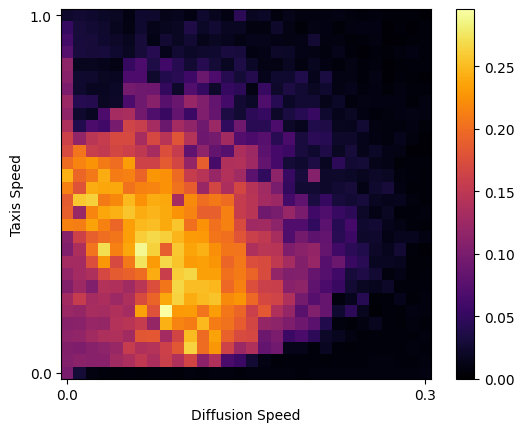

In [7]:
fig, ax = plt.subplots()
# pos = ax.imshow(taxis_data_avg, origin="lower", cmap="inferno", vmin=0.0, vmax=0.5)
pos = ax.imshow(taxis_data_avg, origin="lower", cmap="inferno", vmin=0.0)

fig.colorbar(pos)
ax.set_xlabel("Diffusion Speed")
ax.set_ylabel("Taxis Speed")
ax.set_xticks([0,29], [diff_list[0],diff_list[-1]])
ax.set_yticks([0,29], [taxis_list[0], taxis_list[-1]])
plt.show()

Average Memory/Diffusion Sensitivity of 5 different initial conditions.

Text(3, 0, 'E')

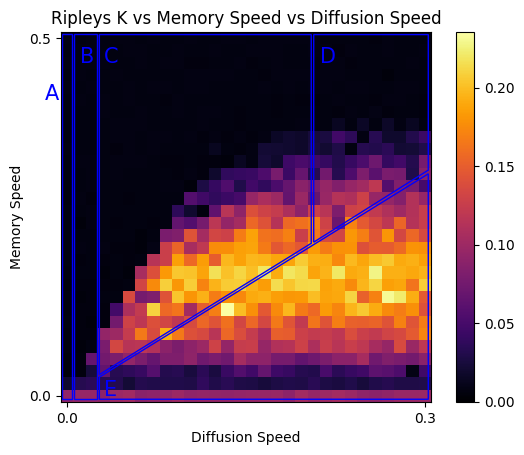

In [8]:
eks_mean = np.load("/media/jonatank/PG/HML/mem_sens_final_ks_avg.npy")
mem_list = np.load("/media/jonatank/PG/HML/mem_sens_mlist.npy")
diff_list = np.load("/media/jonatank/PG/HML/mem_sens_dlist.npy")
fig, ax = plt.subplots()
# im = ax.imshow(eks_mean, origin="lower", cmap="inferno", vmin=0,vmax=0.5)
im = ax.imshow(eks_mean, origin="lower", cmap="inferno", vmin=0)
fig.colorbar(im)
ax.set_title("Ripleys K vs Memory Speed vs Diffusion Speed")
ax.set_yticks([0,29],[np.min(mem_list), np.max(mem_list)])
ax.set_xticks([0,29],[np.min(diff_list), np.max(diff_list)])
ax.set_ylabel("Memory Speed")
ax.set_xlabel("Diffusion Speed")
x=np.linspace(0,29,100)
rect0 = mpatches.Rectangle((.55,-0.3),1.9,29.65, linewidth=1, edgecolor = "b", facecolor="none")
rect1 = mpatches.Rectangle((-0.45,-0.3),0.8,29.65, linewidth=1, edgecolor = "b", facecolor="none")
# rect1 = mpatches.Rectangle((20.5,-0.3),8.8,29.6, linewidth=1, edgecolor = "b", facecolor="none")
tri = mpatches.Polygon([(2.6,-0.3), (2.6,1.5), (29.3,18), (29.3,-0.3), (2.6,-0.3)], linewidth=1, edgecolor="b", facecolor="none") 
trap0 = mpatches.Polygon([(2.6,29.3), (2.6,1.7), (19.8,12.36), (19.8,29.3), (2.6,29.3)], linewidth=1, edgecolor="b", facecolor="none") 
trap1 = mpatches.Polygon([(29.3,29.3), (29.3,18.3), (20,12.45), (20,29.3), (29.3,29.3)], linewidth=1, edgecolor="b", facecolor="none") 
ax.add_patch(rect0)
ax.add_patch(rect1)
ax.add_patch(trap0)
ax.add_patch(trap1)
ax.add_patch(tri)
ax.text(-1.8,24,"A",color="b",fontsize=15)
ax.text(1,27,"B",color="b",fontsize=15)
ax.text(3,27,"C",color="b",fontsize=15)
ax.text(20.5,27,"D",color="b",fontsize=15)
ax.text(3,0,"E",color="b",fontsize=15)


Initial Condition Dependence

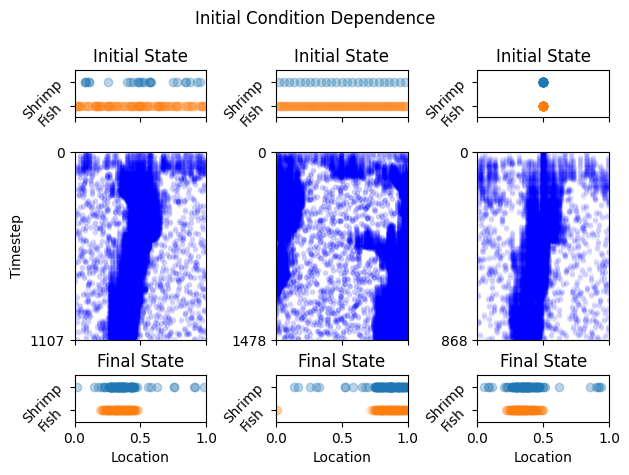

In [9]:
fig, ax = plt.subplots(3,3,sharex=True, height_ratios=[0.2,0.8,0.2])
for run in range(3):
    a = get_all(f"/media/jonatank/PG/HML/taxis_sens_{[0,1,4][run]}/taxis_0.20689655172413793/diff_0.11379310344827587/")
    ss = [s[0] for s in a]
    fs = [f[1] for f in a]

    l=len(a)-1
    ax[0][run].scatter(ss[0], [3/4 for _ in ss[0]], alpha=0.3)
    ax[0][run].scatter(fs[0], [1/4 for _ in fs[0]], alpha=0.1)
    ax[2][run].scatter(ss[l], [3/4 for _ in ss[l]], alpha=0.3)
    ax[2][run].scatter(fs[l], [1/4 for _ in fs[l]], alpha=0.1)
    # ax[0][0].set_ylabel("Time")
    ax[2][run].set_xlabel("Location")
    for i in range(0,l,5):
        ax[1][run].scatter(ss[i],np.zeros_like(ss[i])+i,alpha=0.05, color="b",marker=".")
    ax[1][run].set_ylim(0,l)
    ax[1][run].set_yticks([0,l])
    ax[1][run].invert_yaxis()
    ax[0][run].set_xlim(0,1)
    ax[0][run].set_ylim(0,1)
    ax[2][run].set_xlim(0,1)
    ax[2][run].set_ylim(0,1)
    ax[0][run].set_yticks([1/4,3/4])
    ax[2][run].set_yticks([1/4,3/4])
    ax[0][run].set_yticklabels(["Fish", "Shrimp"])
    ax[2][run].set_yticklabels(["Fish", "Shrimp"])
    ax[2][run].set_title("Final State")
    ax[0][run].set_title("Initial State")
    ax[0][run].tick_params(axis='y', labelrotation=45)
    ax[2][run].tick_params(axis='y', labelrotation=45)
ax[1][0].set_ylabel("Timestep")
fig.suptitle("Initial Condition Dependence")
fig.tight_layout(h_pad=0.3, w_pad=0.3)
plt.show()

Taxis Speed Sensitivity

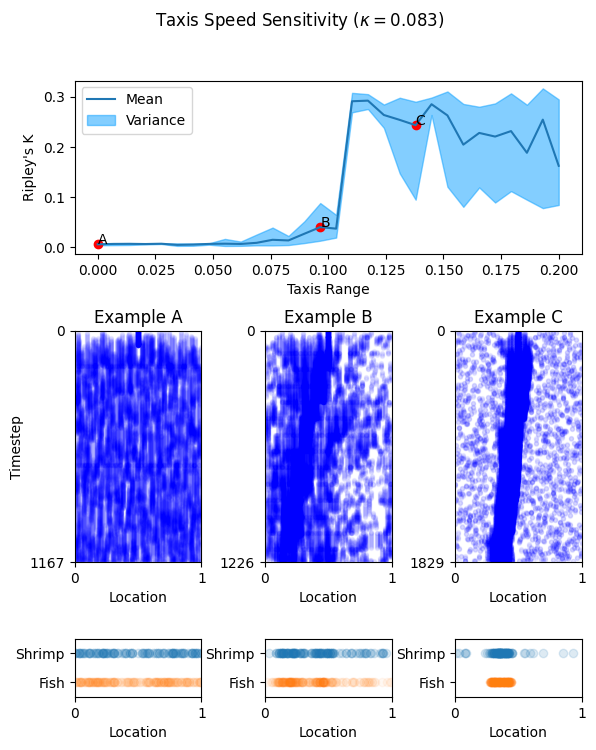

In [14]:
# slice_index = 8
pop_out_indexes = [0,14,20]
# pop_out_indexes = [19,20,25]
# eks_mean = np.load("/media/jonatank/PG/HML/taxis_sens_final_ks_avg.npy")
# eks = np.load("/media/jonatank/PG/HML/taxis_sens_final_ks.npy")
# taxis_list = np.load("/media/jonatank/PG/HML/taxis_sens_tlist.npy")
# diff_list = np.load("/media/jonatank/PG/HML/taxis_sens_dlist.npy")
# slice_mean = eks_mean[:,slice_index]
# slice_list = [eks[i][:,slice_index] for i in range(5)]
# slice_var = np.var(slice_list, axis=0)

diff = 0.083
t_dir = "taxis_quick_long"
# t_dir = "taxis_quick"
# ics_dirs = np.sort(os.listdir("taxis_quick"))
# taxis_dirs = np.sort(os.listdir(f"taxis_quick/{ics_dirs[4]}/"))
ics_dirs = np.sort(os.listdir(t_dir))
taxis_dirs = np.sort(os.listdir(f"{t_dir}/{ics_dirs[4]}/"))
taxis_list = np.array([float(i[6:]) for i in taxis_dirs])
slice_list= []
for ic_dir in ics_dirs:
    t_ks = []
    for taxis_dir in taxis_dirs:
        s,f = get_final(f"{t_dir}/{ic_dir}/{taxis_dir}/")
        # s,f = get_final(f"taxis_quick/{ic_dir}/{taxis_dir}/")
        k = expectation_diff(s)[0]
        t_ks.append(k)
    slice_list.append(t_ks)

slice_mean = np.array([np.mean(a) for a in np.transpose(slice_list)])
slice_var = np.array([np.var(a) for a in np.transpose(slice_list)])
slice_max = np.array([np.max(a) for a in np.transpose(slice_list)])
slice_min = np.array([np.min(a) for a in np.transpose(slice_list)])



fig = plt.figure()
gs = GridSpec(3,3,  figure = fig, height_ratios=[3,4,1])
axtop = fig.add_subplot(gs[0,:])
axtop.plot(taxis_list, slice_mean, label="Mean")
axtop.fill_between(taxis_list, slice_min, slice_max - slice_var, alpha=0.5, color='#089fff', label="Variance")
# axtop.fill_between(taxis_list, slice_mean+slice_var, slice_mean - slice_var, alpha=0.5, color='#089fff', label="Variance")
axtop.scatter([taxis_list[i] for i in pop_out_indexes], [slice_mean[i] for i in pop_out_indexes], color="r")
# offsets = [[0.01,0],[0.01,-0.02],[0, 0.01]]
offsets = [[0,0] for i in range(3)]
for letter, p in enumerate(pop_out_indexes):
    axtop.text(taxis_list[p]+offsets[letter][0], slice_mean[p]+ offsets[letter][1], ["A","B","C"][letter])
axtop.legend()
axmid = []
for i in range(3):
    axmid.append(fig.add_subplot(gs[1,i]))
axbot = []
for i in range(3):
    axbot.append(fig.add_subplot(gs[2,i]))

for i in range(3):
    # a = get_all(f"/media/jonatank/PG/HML/taxis_sens_0/taxis_{taxis_list[pop_out_indexes[i]]}/diff_{diff_list[slice_index]}/")
    a = get_all(f"{t_dir}/{ics_dirs[4]}/{taxis_dirs[pop_out_indexes[i]]}/")
    ss = [s[0] for s in a]
    fs = [f[1] for f in a]
    l=len(a)-1
    axbot[i].scatter(ss[l], [3/4 for _ in ss[l]], alpha=0.15)
    axbot[i].scatter(fs[l], [1/4 for _ in fs[l]], alpha=0.05)
    # ax[0][0].set_ylabel("Time")
    axbot[i].set_xlabel("Location")
    axmid[i].set_xlabel("Location")
    for c in range(0,l,5):
        axmid[i].scatter(ss[c],np.zeros_like(ss[c])+c,alpha=0.05, color="b",marker=".")
    axmid[i].set_title(f"Example {['A', 'B', 'C'][i]}")
    axmid[i].set_ylim(0,l)
    axmid[i].invert_yaxis()
    axbot[i].set_ylim(0,1)
    axmid[i].set_yticks([0,l])
    axmid[i].set_xticks([0,1])
    axbot[i].set_xticks([0,1])
    axmid[i].set_xlim([0,1])
    axbot[i].set_xlim([0,1])
    axbot[i].set_yticks([1/4,3/4])
    axbot[i].set_yticklabels(["Fish", "Shrimp"])
    axtop.set_xlabel("Taxis Range")
    axtop.set_ylabel("Ripley's K")

axmid[0].set_ylabel("Timestep")
# fig.suptitle(f"Taxis Speed Sensitivity ($\kappa =$ {round(diff_list[slice_index],3)})")
fig.suptitle(f"Taxis Speed Sensitivity ($\kappa = 0.083$)")
fig.tight_layout()
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.set_figheight(8)
fig.set_figwidth(6)

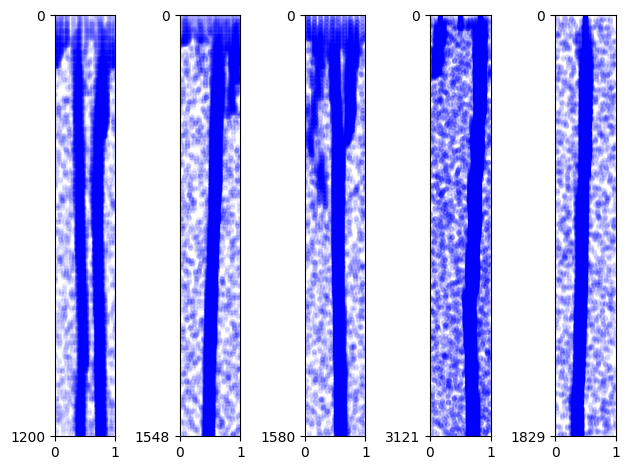

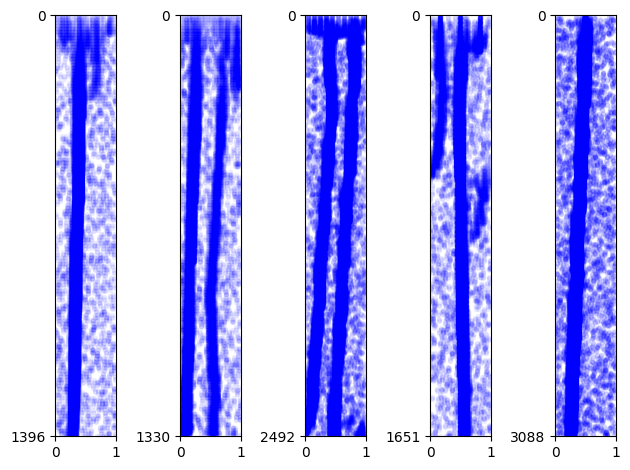

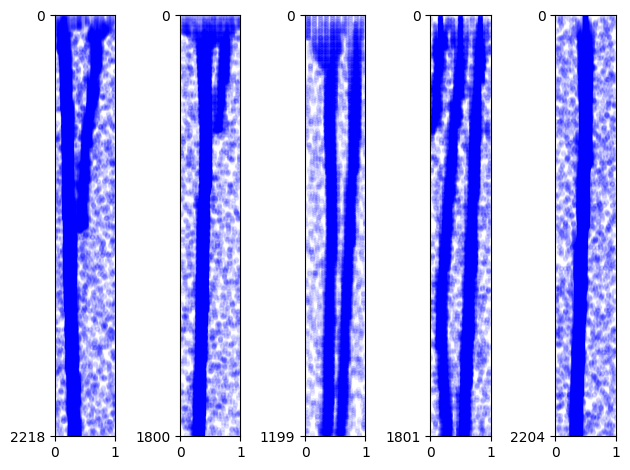

In [16]:
ps = [20,23,24]
for p in ps:
    fig, ax = plt.subplots(1,5)
    for i in range(5):
        a = get_all(f"{t_dir}/{ics_dirs[i]}/{taxis_dirs[p]}/")
        ss = [s[0] for s in a]
        fs = [f[1] for f in a]
        l=len(a)-1
        for c in range(0,l,5):
            ax[i].scatter(ss[c],np.zeros_like(ss[c])+c,alpha=0.05, color="b",marker=".")
            ax[i].set_ylim(0,l)
            ax[i].invert_yaxis()
            ax[i].set_yticks([0,l])
            ax[i].set_xticks([0,1])
            ax[i].set_xlim([0,1])
    fig.tight_layout()
    plt.show()

Memory Speed Sensitivity

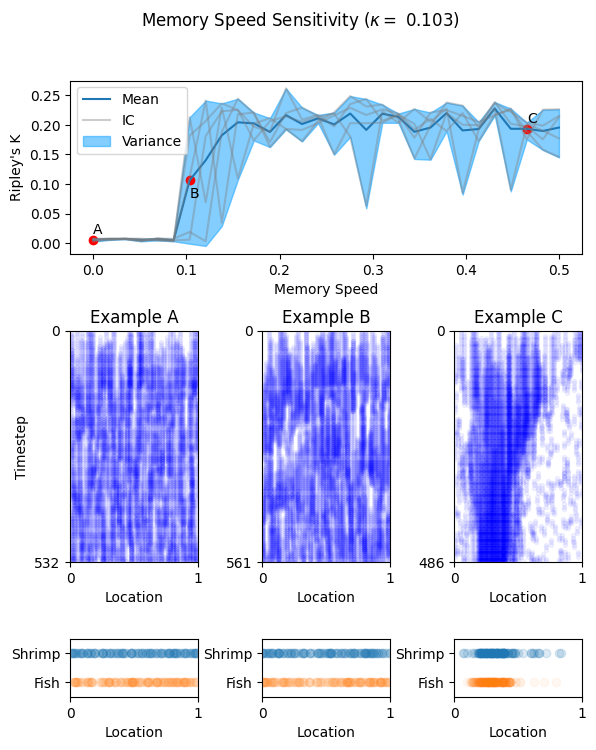

In [13]:
slice_index = 10
pop_out_indexes = [0,6,27]
eks_mean = np.load("/media/jonatank/PG/HML/mem_sens_final_ks_avg.npy")
eks = np.load("/media/jonatank/PG/HML/mem_sens_final_ks.npy")
mem_list = np.load("/media/jonatank/PG/HML/mem_sens_mlist.npy")
diff_list = np.load("/media/jonatank/PG/HML/mem_sens_dlist.npy")
slice_mean = eks_mean[slice_index]
slice_list = [eks[i][slice_index] for i in range(5)]
slice_var = np.var(slice_list, axis=0)
slice_max = np.max(slice_list, axis=0)
slice_min = np.min(slice_list, axis=0)

fig = plt.figure()
gs = GridSpec(3,3,  figure = fig, height_ratios=[3,4,1])
axtop = fig.add_subplot(gs[0,:])
# axtop.plot(mem_list, slice_mean, label="Mean")
axtop.plot(mem_list, slice_mean, label="Mean")
for i in range(5):
    if i ==0:
        axtop.plot(mem_list, slice_list[i], label=f"IC", color="grey", alpha=0.4)
    else:
        axtop.plot(mem_list, slice_list[i], color="grey", alpha=0.4)
# axtop.fill_between(mem_list, slice_mean+slice_var, slice_mean - slice_var, alpha=0.5, color='#089fff', label="Variance")
axtop.fill_between(mem_list, slice_max, slice_min - slice_var, alpha=0.5, color='#089fff', label="Variance")
axtop.scatter([mem_list[i] for i in pop_out_indexes], [slice_mean[i] for i in pop_out_indexes], color="r")
offsets = [[0,0.01],[0,-0.03],[0, 0.01]]
for letter, p in enumerate(pop_out_indexes):
    axtop.text(mem_list[p]+offsets[letter][0], slice_mean[p]+ offsets[letter][1], ["A","B","C"][letter])
axtop.legend()
axmid = []
for i in range(3):
    axmid.append(fig.add_subplot(gs[1,i]))
axbot = []
for i in range(3):
    axbot.append(fig.add_subplot(gs[2,i]))

for i in range(3):
    a = get_all(f"/home/jonatank/Documents/HML/cleaning/ABM/fp/mem_sens_ics/run_0/mem_{mem_list[pop_out_indexes[i]]}/diff_{diff_list[slice_index]}/")
    ss = [s[0] for s in a]
    fs = [f[1] for f in a]
    l=len(a)-1
    axbot[i].scatter(ss[l], [3/4 for _ in ss[l]], alpha=0.15)
    axbot[i].scatter(fs[l], [1/4 for _ in fs[l]], alpha=0.05)
    # ax[0][0].set_ylabel("Time")
    axbot[i].set_xlabel("Location")
    axmid[i].set_xlabel("Location")
    for c in range(0,l,5):
        axmid[i].scatter(ss[c],np.zeros_like(ss[c])+c,alpha=0.05, color="b",marker=".")
    axmid[i].set_title(f"Example {['A', 'B', 'C'][i]}")
    axmid[i].set_ylim(0,l)
    axmid[i].invert_yaxis()
    axbot[i].set_ylim(0,1)
    axmid[i].set_yticks([0,l])
    axmid[i].set_xticks([0,1])
    axbot[i].set_xticks([0,1])
    axbot[i].set_yticks([1/4,3/4])
    axbot[i].set_yticklabels(["Fish", "Shrimp"])
    axmid[i].set_xlim([0,1])
    axbot[i].set_xlim([0,1])
    axtop.set_xlabel("Memory Speed")
    axtop.set_ylabel("Ripley's K")

axmid[0].set_ylabel("Timestep")
fig.suptitle(f"Memory Speed Sensitivity ($\kappa =$ {round(diff_list[slice_index],3)})")
fig.tight_layout()
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.set_figheight(8)
fig.set_figwidth(6)

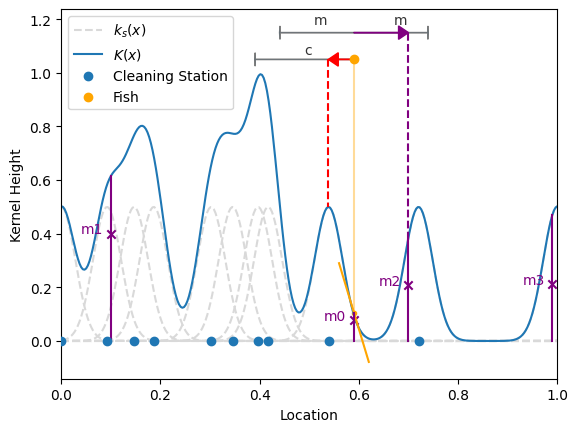

In [12]:
def mem_func(x):
    return 0.75-0.1*x
np.random.seed(1)
stations = np.random.rand(10)
x = np.linspace(0,1,300)
ind_kernals = [[kernel(x_v,s) for x_v in x] for s in stations]
K = np.sum(ind_kernals, axis=0) 
f_loc = 0.59
k_f_loc = K[np.argmin(np.absolute(x-f_loc))]
grad_offset = 0.03
grad = (K[np.argmin(np.absolute(x-f_loc))]-K[np.argmin(np.absolute(x-f_loc))+1])/((x[0]-x[1]))
taxis_x = 161
c=0.2
mem_dest = 0.7
mem = [f_loc, 0.1,mem_dest,0.99]
mem_rate=0.15
lab = True
for k in ind_kernals:
    stren= 0.85
    if lab: 
        plt.plot(x,k, color=stren*np.array([1,1,1]),zorder=0,label="$k_s(x)$", linestyle="--")
        lab=False
    else:
        plt.plot(x,k, color=stren*np.array([1,1,1]),zorder=0,linestyle="--")

plt.plot(x,K, label="$K(x)$")
plt.scatter(stations, np.zeros_like(stations),zorder=10, label="Cleaning Station")
plt.plot([f_loc,f_loc],[1.05,k_f_loc],alpha = 0.4,color="orange")
plt.plot([f_loc+grad_offset,f_loc-grad_offset],[k_f_loc+grad_offset*grad,k_f_loc-grad_offset*grad],color="orange")
plt.arrow(f_loc,1.05,-c,0,length_includes_head=True, head_width=0.05,head_length=0.001, edgecolor="black", alpha=0.5)
plt.plot([x[taxis_x],x[taxis_x]],[1.05,K[taxis_x]],alpha = 1,color="r",linestyle="--")
plt.arrow(f_loc,1.05,x[taxis_x]-f_loc,0,length_includes_head=True, head_width=0.05,head_length=0.02, edgecolor="r",facecolor='r', alpha=1)
plt.scatter([f_loc],[1.05], label="Fish",color="orange")
plt.scatter([f_loc],[k_f_loc],color="orange",marker=".")

for i,m in enumerate(mem):
    y = K[np.argmin(np.absolute(x-m))]
    plt.plot([m,m],[0,y],color="purple")
    plt.annotate(f"m{i}",[m-0.06,y*mem_func(i)],color="purple")
    plt.scatter([m],[y*mem_func(i)],marker="x",color="purple")
plt.arrow(f_loc,1.15,-mem_rate,0,length_includes_head=True, head_width=0.05,head_length=0.001, edgecolor="black", alpha=0.5)
plt.arrow(f_loc,1.15,mem_rate,0,length_includes_head=True, head_width=0.05,head_length=0.001, edgecolor="black", alpha=0.5)
plt.arrow(f_loc,1.15,mem_dest-f_loc,0,length_includes_head=True, head_width=0.05,head_length=0.02, edgecolor="purple",facecolor='purple', alpha=1)
plt.plot([mem_dest,mem_dest],[1.15,K[np.argmin(np.absolute(x-mem_dest))]],linestyle="--",color="purple")
plt.annotate(f"c",[f_loc-c/2,1.07],color="black",alpha=0.8)
plt.annotate(f"m",[f_loc+0.08,1.18],color="black",alpha=0.8)
plt.annotate(f"m",[f_loc-0.08,1.18],color="black",alpha=0.8)
plt.xlim(0,1)
plt.xlabel("Location")
plt.ylabel("Kernel Height")
plt.legend()

Text(0.5, 1.0, 'Memory based Movement')

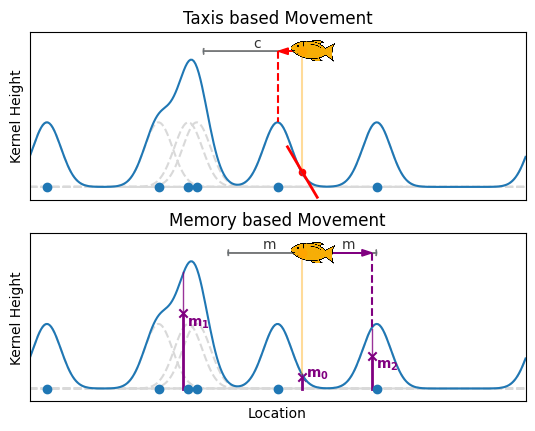

In [13]:
def mem_func(x):
    return 0.75-0.1*x
np.random.seed(1)
stations = [0.035,0.26,0.32,0.337,0.5,0.7]
x = np.linspace(0,1,300)
ind_kernals = [[kernel(x_v,s) for x_v in x] for s in stations]
K = np.sum(ind_kernals, axis=0) 
f_loc = 0.55
k_f_loc = K[np.argmin(np.absolute(x-f_loc))]
grad_offset = 0.03
grad = (K[np.argmin(np.absolute(x-f_loc))]-K[np.argmin(np.absolute(x-f_loc))+1])/((x[0]-x[1]))
taxis_x = 150
c=0.2
mem_dest = 0.69
mem = [f_loc, 0.31,mem_dest]
mem_rate=0.15
lab = True
fig, ax = plt.subplots(2,1,sharex=True)


for plot_num in [0,1]:
    image = plt.imread("fish.png")
    im = OffsetImage(image,zoom=0.030)
    ab = AnnotationBbox(im,(f_loc+0.028,1.05), xycoords='data', frameon=False)
    ax[plot_num].add_artist(ab)
    for k in ind_kernals:
        stren= 0.85
        if lab: 
            ax[plot_num].plot(x,k, color=stren*np.array([1,1,1]),zorder=0,label="$k_s(x)$", linestyle="--")
            lab=False
        else:
            ax[plot_num].plot(x,k, color=stren*np.array([1,1,1]),zorder=0,linestyle="--")
    ax[plot_num].plot(x,K, label="$K(x)$")
    ax[plot_num].scatter(stations, np.zeros_like(stations),zorder=10, label="Cleaning Station")
    ax[plot_num].scatter([f_loc],[1.05], label="Fish",color="orange",zorder=50)
    ax[plot_num].plot([f_loc,f_loc],[1.05,k_f_loc],alpha = 0.4,color="orange")
ax[0].plot([f_loc+grad_offset,f_loc-grad_offset],[k_f_loc+grad_offset*grad,k_f_loc-grad_offset*grad],color="r", linewidth=2)
ax[0].arrow(f_loc,1.05,-c,0,length_includes_head=True, head_width=0.05,head_length=0.001, edgecolor="black", alpha=0.5)
ax[0].plot([x[taxis_x],x[taxis_x]],[1.05,K[taxis_x]],alpha = 1,color="r",linestyle="--")
ax[0].arrow(f_loc,1.05,x[taxis_x]-f_loc,0,length_includes_head=True, head_width=0.05,head_length=0.02, edgecolor="r",facecolor='r', alpha=1)
ax[0].scatter([f_loc],[k_f_loc],color="r",s=20)
text_y_offsets=[-0,-0.1,-0.1]
for i,m in enumerate(mem):
    y = K[np.argmin(np.absolute(x-m))]
    ax[1].plot([m,m],[y*mem_func(i),y],color="purple", linewidth=1, alpha=0.8)
    ax[1].plot([m,m],[0,y*mem_func(i)],color="purple",linewidth = 2)
    ax[1].annotate("$\mathbf{m_"+str(i)+"}$",[m+0.008,y*mem_func(i)+text_y_offsets[i]],color="purple")
    ax[1].scatter([m],[y*mem_func(i)],marker="x",color="purple")
ax[1].arrow(f_loc,1.05,-mem_rate,0,length_includes_head=True, head_width=0.05,head_length=0.001, edgecolor="black", alpha=0.5)
ax[1].arrow(f_loc,1.05,mem_rate,0,length_includes_head=True, head_width=0.05,head_length=0.001, edgecolor="black", alpha=0.5)
ax[1].arrow(f_loc,1.05,mem_dest-f_loc,0,length_includes_head=True, head_width=0.05,head_length=0.02, edgecolor="purple",facecolor='purple', alpha=1)
ax[1].plot([mem_dest,mem_dest],[1.05,K[np.argmin(np.absolute(x-mem_dest))]],linestyle="--",color="purple")
ax[0].annotate(f"c",[f_loc-c/2,1.08],color="black",alpha=0.8)
ax[1].annotate(f"m",[f_loc+0.08,1.08],color="black",alpha=0.8)
ax[1].annotate(f"m",[f_loc-0.08,1.08],color="black",alpha=0.8)
plt.xlim(0,1)
for plot_num in [0,1]:
    ax[plot_num].set_ylim(-0.1,1.2)
plt.xlabel("Location")
plt.xticks([])
ax[0].set_yticks([])
ax[1].set_yticks([])
ax[0].set_ylabel("Kernel Height")
ax[1].set_ylabel("Kernel Height")
ax[0].set_title("Taxis based Movement")
ax[1].set_title("Memory based Movement")
# plt.legend()